In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

In [101]:
from google.colab import drive
drive.mount("/content/drive")
import os
import pandas as pd

Mounted at /content/drive


In [102]:
os.chdir("/content/drive/My Drive/Nova/SEE_Project")

In [103]:
os.getcwd()

'/content/drive/My Drive/Nova/SEE_Project'

In [81]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=3000)

In [82]:
x_train.shape

(25000,)

In [84]:
x_train=x_train[:15000]
y_train=y_train[:15000]

In [85]:
x_test=x_test[:3000]
y_test=y_test[:3000]

In [86]:
x_train[0][:5]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25

In [87]:
y_train[0]

1

In [88]:
word_index = imdb.get_word_index()

# Reverse the word index to map indices to words
reverse_word_index = {value: key for key, value in word_index.items()}

# Function to decode a review
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Example usage: Decode the first review
decoded_review = decode_review(x_train[0])
print(decoded_review)

? this film was just brilliant casting location scenery story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? island as myself so i loved the fact there was a real connection with this film the witty ? throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly ? was amazing really ? at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so lovely because it was true and w

In [89]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Assuming the tokenizer is set up with the right vocabulary
tokenizer = Tokenizer(num_words=2000)
tokenizer.word_index = {v: k for k, v in reverse_word_index.items()}  # Load the existing word index

new_text = "This is a new sentence with new words."
new_sequences = tokenizer.texts_to_sequences([new_text.lower()])  # Tokenize and convert to sequences
new_sequences=sequence.pad_sequences(new_sequences,maxlen=80)

print(new_sequences)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  11   6   3 159  16 159 712]]


In [90]:
x_train = sequence.pad_sequences(x_train, maxlen=80)
x_test = sequence.pad_sequences(x_test, maxlen=80)

In [91]:
model = Sequential()
model.add(Embedding(2000, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [95]:
from keras import optimizers

maxlen=80

def simple_LSTM():
    model = Sequential()
    model.add(Embedding(3000, 128))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

    return model

In [96]:
# model=lstm_rnn_model()

In [97]:
model=simple_LSTM()
model.fit(x_train, y_train,
          batch_size=32,
          epochs=15,
          validation_data=(x_test, y_test))

Epoch 1/15
469/469 [==============================] - 133s 276ms/step - loss: 0.4858 - accuracy: 0.7585 - val_loss: 0.4122 - val_accuracy: 0.8087
Epoch 2/15
469/469 [==============================] - 122s 259ms/step - loss: 0.3456 - accuracy: 0.8519 - val_loss: 0.4824 - val_accuracy: 0.8107
Epoch 3/15
469/469 [==============================] - 123s 262ms/step - loss: 0.2873 - accuracy: 0.8777 - val_loss: 0.4271 - val_accuracy: 0.8230
Epoch 4/15
469/469 [==============================] - 125s 266ms/step - loss: 0.2465 - accuracy: 0.9001 - val_loss: 0.4683 - val_accuracy: 0.8217
Epoch 5/15
469/469 [==============================] - 126s 268ms/step - loss: 0.2120 - accuracy: 0.9154 - val_loss: 0.5143 - val_accuracy: 0.8150
Epoch 6/15
469/469 [==============================] - 122s 259ms/step - loss: 0.1771 - accuracy: 0.9305 - val_loss: 0.5359 - val_accuracy: 0.8083
Epoch 7/15
469/469 [==============================] - 124s 264ms/step - loss: 0.1457 - accuracy: 0.9448 - val_loss: 0.6150 -

In [104]:
model.save_weights("Simple_LSTM1.h5")

In [139]:
new_text = "I am depreseed"
new_sequences = tokenizer.texts_to_sequences([new_text.lower()])  # Tokenize and convert to sequences
new_sequences=sequence.pad_sequences(new_sequences,maxlen=80)

new_sequences

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         10, 241]], dtype=int32)

In [140]:
y_pre=model.predict(new_sequences)
y_pre

1/1 [==============================] - 0s 66ms/step


array([[0.18775946]], dtype=float32)

In [142]:
sentiment_label = 1 if y_pre[0]>0.7837592 else 0

print("Predicted sentiment label:", sentiment_label)

Predicted sentiment label: 0


In [113]:
y_pred=model.predict(x_test)
y_pred[:5]

94/94 [==============================] - 3s 34ms/step


array([[0.00406252],
       [0.99933314],
       [0.00137136],
       [0.99998647],
       [1.        ]], dtype=float32)

In [114]:
y_predi=[]
threshold= 0.7837592
for i in y_pred:
  if i>threshold:
    y_predi.append(1)
  else:
    y_predi.append(0)

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
conf_matrix = confusion_matrix(y_test, y_predi)
print("Confusion Matrix:")
conf_matrix

Confusion Matrix:


array([[1208,  358],
       [ 243, 1191]])

In [116]:
accuracy_gen = accuracy_score(y_test, y_predi)
print("Accuracy:", accuracy_gen)

precision_gen = precision_score(y_test, y_predi, average='weighted')
print("Precision:", precision_gen)

recall_gen = recall_score(y_test, y_predi, average='weighted', zero_division=1)
print("Recall:", recall_gen)

f1_gen = f1_score(y_test, y_predi, average='weighted')
print("F1 Score:", f1_gen)

Accuracy: 0.7996666666666666
Precision: 0.802106435356129
Recall: 0.7996666666666666
F1 Score: 0.7997101849159377


In [117]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [118]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 0.7837592


Area Under Curve (AUC): 0.8643386930430647



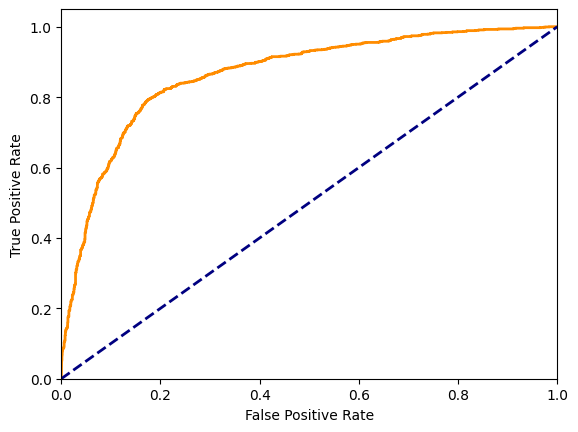

In [119]:
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print("Area Under Curve (AUC):", roc_auc)
print()